In [ ]:
!pip install nsepy

In [3]:
from nsepy import get_history
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
inp = input("type code: ")

data = get_history(symbol=inp, start=date(2015,1,1), end=date(2020,1,31))
data.to_csv("data.csv")
df = pd.read_csv("data.csv")
df.head()

type code: HDFC


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,HDFC,EQ,1135.90,1130.0,1131.15,1120.10,1125.90,1124.00,1124.23,401576,4.514650e+13,11804,128793,0.3207
1,2015-01-02,HDFC,EQ,1124.00,1127.3,1176.95,1125.35,1171.05,1171.90,1159.93,2019816,2.342845e+14,59071,1258847,0.6232
2,2015-01-05,HDFC,EQ,1171.90,1168.8,1175.00,1150.40,1154.95,1156.40,1159.24,2219458,2.572880e+14,57749,1414720,0.6374
3,2015-01-06,HDFC,EQ,1156.40,1148.6,1148.60,1096.10,1098.00,1101.95,1117.84,2531748,2.830100e+14,81436,1547523,0.6112
4,2015-01-07,HDFC,EQ,1101.95,1097.5,1114.15,1095.00,1097.65,1099.25,1105.58,2406880,2.660992e+14,133109,1533304,0.6371


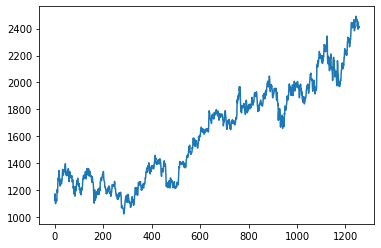

In [15]:
df1 = df.reset_index()['Close']
plt.plot(df1)

In [16]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [18]:
train = new_data[:900]
valid = new_data[900:]

preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
187.00795055430112


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


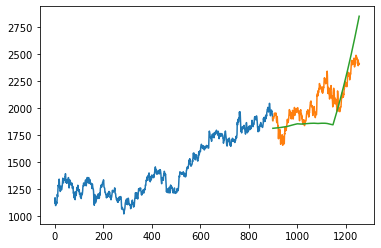

In [24]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])